In [116]:
# Import libraries

import pandas as pd
import numpy as np
from numpy import mean
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [117]:
# Read irish transport dataset

dataset=pd.read_csv('Luas Passenger Numbers.csv')
dataset

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,01,January,Number,1664495
1,TOA11C01,Red line,2018,2018,02,February,Number,1657562
2,TOA11C01,Red line,2018,2018,03,March,Number,1661098
3,TOA11C01,Red line,2018,2018,04,April,Number,1794424
4,TOA11C01,Red line,2018,2018,05,May,Number,1934553
...,...,...,...,...,...,...,...,...
190,TOA11C03,All Luas lines,2022,2022,09,September,Number,3811093
191,TOA11C03,All Luas lines,2022,2022,10,October,Number,4219124
192,TOA11C03,All Luas lines,2022,2022,11,November,Number,4375705
193,TOA11C03,All Luas lines,2022,2022,12,December,Number,4030698


#### Getting all the necessary information

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC        195 non-null    object
 1   Statistic Label  195 non-null    object
 2   TLIST(A1)        195 non-null    int64 
 3   Year             195 non-null    int64 
 4   C01885V02316     195 non-null    object
 5   Month            195 non-null    object
 6   UNIT             195 non-null    object
 7   VALUE            195 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.3+ KB


In [119]:
dataset.describe()

,TLIST(A1),Year,VALUE
count,195.000000,195.000000,1.950000e+02
mean,2020.000000,2020.000000,3.436091e+06
std,1.417854,1.417854,6.434377e+06
min,2018.000000,2018.000000,8.935800e+04
25%,2019.000000,2019.000000,1.122000e+06
50%,2020.000000,2020.000000,1.846358e+06
75%,2021.000000,2021.000000,2.885632e+06
max,2022.000000,2022.000000,4.834723e+07


In [120]:
dataset.shape

(195, 8)

In [121]:
dataset.isnull().sum()

STATISTIC          0
Statistic Label    0
TLIST(A1)          0
Year               0
C01885V02316       0
Month              0
UNIT               0
VALUE              0
dtype: int64

In [122]:
dataset.nunique()

STATISTIC            3
Statistic Label      3
TLIST(A1)            5
Year                 5
C01885V02316        13
Month               13
UNIT                 1
VALUE              195
dtype: int64

#### Cleaning irish transport dataset

In [123]:
dataset.drop(columns=['STATISTIC','TLIST(A1)','C01885V02316'],inplace=True)

In [124]:
dataset=dataset.loc[(dataset['Statistic Label']=='All Luas lines') & (dataset['Month']!='All months')]
dataset.head()

,Statistic Label,Year,Month,UNIT,VALUE
130,All Luas lines,2018,January,Number,3218649
131,All Luas lines,2018,February,Number,3118289
132,All Luas lines,2018,March,Number,3097570
133,All Luas lines,2018,April,Number,3350056
134,All Luas lines,2018,May,Number,3622338


In [125]:
#Make sure there are no duplicated values (work only with "All Luas lines") 

dataset['Statistic Label'].unique()

array(['All Luas lines'], dtype=object)

In [126]:
# Make sure there are only months in the month column

dataset['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [127]:
dataset.rename(columns = {"Statistic Label":"Transport Type"},inplace=True)
dataset = dataset[['Year','Month','Transport Type','UNIT','VALUE']].reset_index(drop=True)
dataset

,Year,Month,Transport Type,UNIT,VALUE
0,2018,January,All Luas lines,Number,3218649
1,2018,February,All Luas lines,Number,3118289
2,2018,March,All Luas lines,Number,3097570
3,2018,April,All Luas lines,Number,3350056
4,2018,May,All Luas lines,Number,3622338
5,2018,June,All Luas lines,Number,3378751
6,2018,July,All Luas lines,Number,3490513
7,2018,August,All Luas lines,Number,3363274
8,2018,September,All Luas lines,Number,3487373
9,2018,October,All Luas lines,Number,3919977


In [13]:
#dataset.set_index(('Year'),inplace=True)

In [128]:
dataset['Transport Type'].replace('All Luas lines','Luas',inplace=True)
dataset['UNIT'].replace('Number','Millions',inplace=True)
dataset['VALUE']=dataset['VALUE']/1000000
dataset

,Year,Month,Transport Type,UNIT,VALUE
0,2018,January,Luas,Millions,3.218649
1,2018,February,Luas,Millions,3.118289
2,2018,March,Luas,Millions,3.097570
3,2018,April,Luas,Millions,3.350056
4,2018,May,Luas,Millions,3.622338
5,2018,June,Luas,Millions,3.378751
6,2018,July,Luas,Millions,3.490513
7,2018,August,Luas,Millions,3.363274
8,2018,September,Luas,Millions,3.487373
9,2018,October,Luas,Millions,3.919977


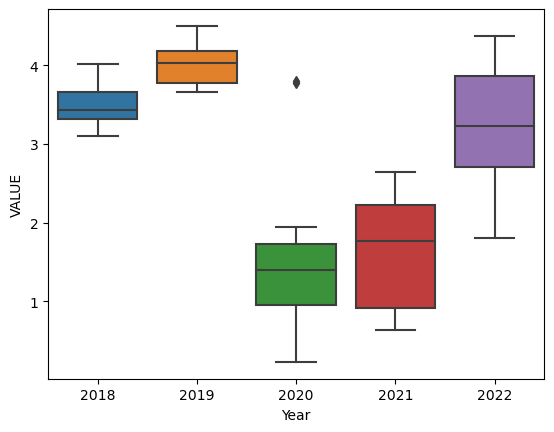

In [129]:
# Creating boxplot so we can see distribution of transported passengers throughout years

sns.boxplot(data=dataset, x="Year", y="VALUE");

In [132]:
# Creating a dataframe by year

dataset_year=dataset.groupby("Year").sum('VALUE')
dataset_year["Transport Type"],dataset_year['UNIT']=['Luas']*5,['Millions']*5
dataset_year = dataset_year[['Transport Type','UNIT','VALUE']].reset_index()
dataset_year

,Year,Transport Type,UNIT,VALUE
0,2018,Luas,Millions,41.836969
1,2019,Luas,Millions,48.347231
2,2020,Luas,Millions,19.176056
3,2021,Luas,Millions,19.481319
4,2022,Luas,Millions,38.667875


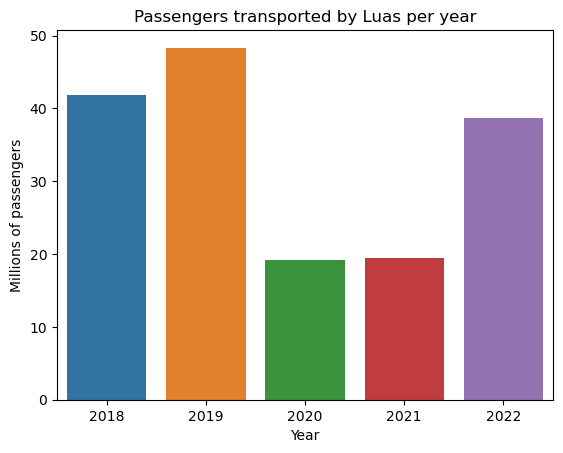

In [135]:
# In this case boxplot doesn't work because there's only 1 value per year, so we use barplot
sns.barplot(dataset_year,x='Year',y='VALUE')
plt.ylabel('Millions of passengers')
plt.title('Passengers transported by Luas per year');

#### Reading 2nd country transport dataset

In [136]:
dataset2=pd.read_csv('etup_mensual_tr_cifra_1986_2023.csv')
dataset2

,ANIO,ID_MES,TRANSPORTE,VARIABLE,ID_ENTIDAD,ID_MUNICIPIO,VALOR,ESTATUS
0,1986,1,Red de Transporte de Pasajeros,Autobuses en operación de lunes a viernes,9,999,4201.0,Cifras Definitivas
1,1986,1,Red de Transporte de Pasajeros,Autobuses en operación de sábado a domingo,9,999,2601.0,Cifras Definitivas
2,1986,1,Red de Transporte de Pasajeros,Kilómetros recorridos,9,999,27199400.0,Cifras Definitivas
3,1986,1,Red de Transporte de Pasajeros,Pasajeros transportados,9,999,172000400.0,Cifras Definitivas
4,1986,1,Red de Transporte de Pasajeros,Personal ocupado,9,999,22451.0,Cifras Definitivas
...,...,...,...,...,...,...,...,...
26149,2023,9,Qrobús,Pasajeros transportados,22,14,280250.0,Cifras Preliminares
26150,2023,9,Qrobús,Pasajeros transportados con boleto pagado,22,14,202647.0,Cifras Preliminares
26151,2023,9,Qrobús,Pasajeros transportados con cortesía,22,14,NaN,Cifras Preliminares
26152,2023,9,Qrobús,Pasajeros transportados con descuento,22,14,77603.0,Cifras Preliminares


In [137]:
dataset2.isnull().sum()

ANIO              0
ID_MES            0
TRANSPORTE        0
VARIABLE          0
ID_ENTIDAD        0
ID_MUNICIPIO      0
VALOR           211
ESTATUS           0
dtype: int64

In [138]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26154 entries, 0 to 26153
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ANIO          26154 non-null  int64  
 1   ID_MES        26154 non-null  int64  
 2   TRANSPORTE    26154 non-null  object 
 3   VARIABLE      26154 non-null  object 
 4   ID_ENTIDAD    26154 non-null  int64  
 5   ID_MUNICIPIO  26154 non-null  int64  
 6   VALOR         25943 non-null  float64
 7   ESTATUS       26154 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.6+ MB


In [139]:
dataset2.describe()

,ANIO,ID_MES,ID_ENTIDAD,ID_MUNICIPIO,VALOR
count,26154.000000,26154.000000,26154.000000,26154.000000,2.594300e+04
mean,2012.165443,6.439818,13.030512,474.264701,6.389296e+06
std,9.128296,3.422402,3.962639,478.079775,2.109140e+07
min,1986.000000,1.000000,8.000000,14.000000,0.000000e+00
25%,2006.000000,3.000000,9.000000,39.000000,7.300000e+01
50%,2014.000000,6.000000,14.000000,48.000000,7.432300e+04
75%,2020.000000,9.000000,15.000000,999.000000,2.547288e+06
max,2023.000000,12.000000,22.000000,999.000000,2.156010e+08


In [140]:
dataset2.shape

(26154, 8)

For the 2nd database, we got a dabatase of mexican public transport, this one conitains several transport systems and differents states, so we'll reduce it to the most simlar transport system and the a city with a similar number of poplation than Dublin.

but we'll be looking only at the transport in Mexico City(ID_ENTIDAD=9), which is the capital city of Mexico, such as Dublin is the capital city of Ireland, and we'll be focusing in "Tren ligero" which could be the most similar one to the Luas

In [141]:
# This dataset contains information from 1986 - 2023, but we only need data from 2018 - 2022

dataset2['ANIO'].unique()

array([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023], dtype=int64)

In [142]:
# Read the files needed to identify states and cities in mexican database

id_states=pd.read_csv('tc_entidad.csv')
id_states

,ID_ENTIDAD,NOM_ENTIDAD
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila de Zaragoza
5,6,Colima
6,7,Chiapas
7,8,Chihuahua
8,9,Ciudad de México
9,10,Durango


In [143]:
id_cities=pd.read_csv('tc_municipio.csv')
id_cities

,ID_ENTIDAD,ID_MUNICIPIO,NOM_MUNICIPIO
0,1,1,Aguascalientes
1,1,2,Asientos
2,1,3,Calvillo
3,1,4,Cosío
4,1,5,Jesús María
...,...,...,...
2497,32,55,Villanueva
2498,32,56,Zacatecas
2499,32,57,Trancoso
2500,32,58,Santa María de la Paz


Now we need to find for which states and cities we have information to work with and since LUAS runs only in Dublin City, we'll focus in a city, first we need to find the state

In this dataset ID_ENTIDAD is translated to ID_STATE and ID_MUNICIPIO to ID_CITY

In [144]:
#Identify states in caintained in the dataset

dataset2['ID_ENTIDAD'].unique()

array([ 9, 19, 14, 15, 22, 13,  8, 11, 21], dtype=int64)

In [145]:
#Create a dictionary to correlate ID numbers and names of states

dict1=pd.Series(id_states.NOM_ENTIDAD.values,index=id_states.ID_ENTIDAD).to_dict()

#Create a for loop to know with how manny cities are we dealing in every state

array=dataset2['ID_ENTIDAD'].unique()
for n in array:
    stat_cit=dataset2.loc[dataset2['ID_ENTIDAD']==n].nunique()
    print('Variables in state', dict1.get(n), f'({n})', '\n')
    print(stat_cit, '\n')
    print('******************','\n')

Variables in state Ciudad de México (9) 

ANIO              38
ID_MES            12
TRANSPORTE         6
VARIABLE          17
ID_ENTIDAD         1
ID_MUNICIPIO       1
VALOR           5990
ESTATUS            2
dtype: int64 

****************** 

Variables in state Nuevo León (19) 

ANIO              29
ID_MES            12
TRANSPORTE         4
VARIABLE          13
ID_ENTIDAD         1
ID_MUNICIPIO       1
VALOR           2173
ESTATUS            2
dtype: int64 

****************** 

Variables in state Jalisco (14) 

ANIO              27
ID_MES            12
TRANSPORTE         8
VARIABLE          12
ID_ENTIDAD         1
ID_MUNICIPIO       1
VALOR           3710
ESTATUS            2
dtype: int64 

****************** 

Variables in state México (15) 

ANIO             16
ID_MES           12
TRANSPORTE        3
VARIABLE          9
ID_ENTIDAD        1
ID_MUNICIPIO      1
VALOR           539
ESTATUS           2
dtype: int64 

****************** 

Variables in state Querétaro (22) 

ANIO      

Now that we've seen there's only 1 STATE and 1 CITY for every type of transport let's find a state that mathces Dublin in someway

In [149]:
# Import dataset of mexican population so we can know which state resemblances the most to dublin's population
pop_mex=pd.read_excel('Poblacion_Mex.xlsx')
pop_mex.dropna(axis=0,inplace=True)
pop_mex=pop_mex[pop_mex['Unnamed: 1'] =='Total'].reset_index(drop=True)
pop_mex=pop_mex.drop(columns=['Unnamed: 1'])
pop_mex.rename(columns = {"Unnamed: 2":"Total Population in Millions"},inplace=True)
pop_mex['Total Population in Millions']=pop_mex['Total Population in Millions']/1000000
pop_mex=pop_mex.sort_values('Total Population in Millions',ascending=False).reset_index(drop=True)
pop_mex

,Instituto Nacional de Estadística y Geografía (INEGI),Total Population in Millions
0,México,16.992418
1,Ciudad de México,9.209944
2,Jalisco,8.348151
3,Veracruz de Ignacio de la Llave,8.062579
4,Puebla,6.583278
5,Guanajuato,6.166934
6,Nuevo León,5.784442
7,Chiapas,5.543828
8,Michoacán de Ocampo,4.748846
9,Oaxaca,4.132148


According to the Dublin Chamber of Commerce website (https://www.dublinchamber.ie/About-Us/Economic-Profile-of-Dublin), population of Dublin as of April 2022 is estimated 
to be 1.43 million, so the one that has more similarity and has transport data would be Queretaro with 2.32 million, but also according to mexican's National Institute of Statistics and Geography website (INEGI), state of Nuevo Leon has 5.78 million, but population of capital city Monterrey is 1.14 millions which makes it the best option to compare ti Dublin's transport

In [31]:
# Import Google Translator library

#!pip3 install googletrans==3.1.0a0

In [179]:
# Reduce the dataset to the same period of dataset (2018-2022)

dataset3=pd.DataFrame()
#print(dataset3)
for n in range(2018,2023):
    year = dataset2.loc[dataset2['ANIO'] == n]
    #print(year)
    dataset3=dataset3.append(year)
    #print(dataset3)
dataset3

,ANIO,ID_MES,TRANSPORTE,VARIABLE,ID_ENTIDAD,ID_MUNICIPIO,VALOR,ESTATUS
16431,2018,1,Red de Transporte de Pasajeros,Autobuses en operación de lunes a viernes,9,999,597.0,Cifras Definitivas
16432,2018,1,Red de Transporte de Pasajeros,Autobuses en operación de sábado a domingo,9,999,348.0,Cifras Definitivas
16433,2018,1,Red de Transporte de Pasajeros,Kilómetros recorridos,9,999,3533738.0,Cifras Definitivas
16434,2018,1,Red de Transporte de Pasajeros,Pasajeros transportados,9,999,10478998.0,Cifras Definitivas
16435,2018,1,Red de Transporte de Pasajeros,Personal ocupado,9,999,4155.0,Cifras Definitivas
...,...,...,...,...,...,...,...,...
24511,2022,12,Qrobús,Pasajeros transportados,22,14,228852.0,Cifras Preliminares
24512,2022,12,Qrobús,Pasajeros transportados con boleto pagado,22,14,187092.0,Cifras Preliminares
24513,2022,12,Qrobús,Pasajeros transportados con cortesía,22,14,NaN,Cifras Preliminares
24514,2022,12,Qrobús,Pasajeros transportados con descuento,22,14,41760.0,Cifras Preliminares


In [180]:
# Changing the names of the columns to correlate them to dataset1

dataset3.rename(
    columns={"ANIO": "Year", "ID_MES": "Month", "TRANSPORTE": "Transport Type", 
             "ID_ENTIDAD":"County","ID_MUNICIPIO":"City","VALOR":"VALUE", "ESTATUS":"STATUS"},
    inplace=True,
)

dataset3

,Year,Month,Transport Type,VARIABLE,County,City,VALUE,STATUS
16431,2018,1,Red de Transporte de Pasajeros,Autobuses en operación de lunes a viernes,9,999,597.0,Cifras Definitivas
16432,2018,1,Red de Transporte de Pasajeros,Autobuses en operación de sábado a domingo,9,999,348.0,Cifras Definitivas
16433,2018,1,Red de Transporte de Pasajeros,Kilómetros recorridos,9,999,3533738.0,Cifras Definitivas
16434,2018,1,Red de Transporte de Pasajeros,Pasajeros transportados,9,999,10478998.0,Cifras Definitivas
16435,2018,1,Red de Transporte de Pasajeros,Personal ocupado,9,999,4155.0,Cifras Definitivas
...,...,...,...,...,...,...,...,...
24511,2022,12,Qrobús,Pasajeros transportados,22,14,228852.0,Cifras Preliminares
24512,2022,12,Qrobús,Pasajeros transportados con boleto pagado,22,14,187092.0,Cifras Preliminares
24513,2022,12,Qrobús,Pasajeros transportados con cortesía,22,14,NaN,Cifras Preliminares
24514,2022,12,Qrobús,Pasajeros transportados con descuento,22,14,41760.0,Cifras Preliminares


In [181]:
# Reducing DataFrame to only 1 state & city (Nuevo Leon, Monterrey)

dataset3 = dataset3.loc[dataset3['County']==19]
dataset3.head(30
             )

,Year,Month,Transport Type,VARIABLE,County,City,VALUE,STATUS
16517,2018,1,Metrobús,Autobuses en operación de lunes a viernes,19,39,535.0,Cifras Definitivas
16518,2018,1,Metrobús,Autobuses en operación de sábado a domingo,19,39,481.0,Cifras Definitivas
16519,2018,1,Metrobús,Kilómetros recorridos,19,39,2674936.0,Cifras Definitivas
16520,2018,1,Metrobús,Pasajeros transportados,19,39,1400112.0,Cifras Definitivas
16521,2018,1,Metrobús,Personal ocupado,19,39,1276.0,Cifras Definitivas
16522,2018,1,Metrobús,Rutas,19,39,29.0,Cifras Definitivas
16523,2018,1,Metrorrey,Energía eléctrica consumida,19,39,2999103.0,Cifras Definitivas
16524,2018,1,Metrorrey,Ingresos por pasaje,19,39,33945968.0,Cifras Definitivas
16525,2018,1,Metrorrey,Kilómetros recorridos,19,39,837346.0,Cifras Definitivas
16526,2018,1,Metrorrey,Longitud de servicio,19,39,32.0,Cifras Definitivas


In [182]:
#Translate the dataframe from spanish to english

import googletrans 
from googletrans import * 
translator = googletrans.Translator()

dataset3['VARIABLE'] = dataset3['VARIABLE'].astype(str) #changing datatype to string 
dataset3['VARIABLE'] = dataset3['VARIABLE'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',)) 

dataset3['Transport Type'] = dataset3['Transport Type'].astype(str) #changing datatype to string 
dataset3['Transport Type'] = dataset3['Transport Type'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',)) 

dataset3['STATUS'] = dataset3['STATUS'].astype(str) #changing datatype to string 
dataset3['STATUS'] = dataset3['STATUS'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',)) 

dataset3 = dataset3.loc[dataset3['VARIABLE']=='Passengers transported']
dataset3.drop(columns=['STATUS','City','County'],inplace=True)

#Create a new dataset so we dont have to translate again in case of anything going wrong
dataset4=dataset3
dataset4

,Year,Month,Transport Type,VARIABLE,VALUE
16520,2018,1,Metrobus,Passengers transported,1400112.0
16527,2018,1,Metrorrey,Passengers transported,13529975.0
16532,2018,1,Transmetro,Passengers transported,2679540.0
16632,2018,2,Metrobus,Passengers transported,1400995.0
16639,2018,2,Metrorrey,Passengers transported,14404827.0
...,...,...,...,...,...
24314,2022,11,Ecovía,Passengers transported,1113148.0
24478,2022,12,Metrobus,Passengers transported,926996.0
24485,2022,12,Metrorrey,Passengers transported,10665017.0
24490,2022,12,Transmetro,Passengers transported,2273365.0


In [191]:
#Create a new dataset with the information translated so we won't have to translate again in case of anything going wrong
dataset4=dataset3

# Now we select our Transport Type, which will be Transmetro
dataset4=dataset4.loc[dataset4['Transport Type']=='Transmetro']

#Replace VARIABLE column for Unitm and reducing units to millions
dataset4.rename(columns={'VARIABLE':'UNIT'},inplace=True)
dataset4['UNIT'].replace('Passengers transported','Millions',inplace=True)
dataset4['VALUE']=dataset4['VALUE']/1000000

#Assigning names to the months
dataset4['Month'] = dataset4['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['January','February','March','April','May',
                                                                            'June','July','August','September','October',
                                                                            'November','December'])
dataset4

,Year,Month,Transport Type,UNIT,VALUE
16532,2018,January,Transmetro,Millions,2.679540
16644,2018,February,Transmetro,Millions,2.669412
16756,2018,March,Transmetro,Millions,2.673496
16868,2018,April,Transmetro,Millions,2.690235
16980,2018,May,Transmetro,Millions,2.979809
17092,2018,June,Transmetro,Millions,2.806689
17204,2018,July,Transmetro,Millions,3.031154
17316,2018,August,Transmetro,Millions,2.909924
17428,2018,September,Transmetro,Millions,2.717423
17540,2018,October,Transmetro,Millions,2.955234


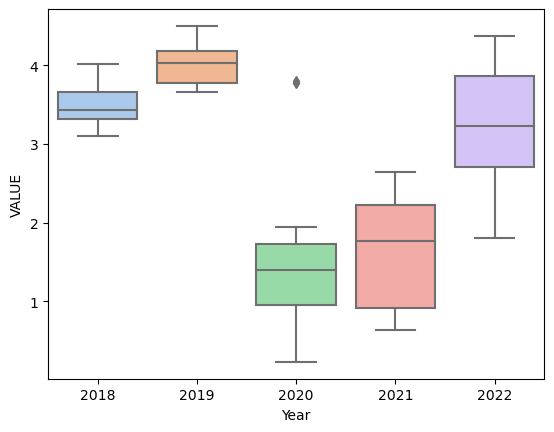

In [207]:
#sns.boxplot(data=dataset4, x='Year',y='VALUE',palette='Spectral');

sns.boxplot(data=dataset, x='Year',y='VALUE',palette='pastel');

In [209]:
# Creating a dataframe by year

dataset4_year=dataset4.groupby("Year")['VALUE'].sum()
dataset4_year=dataset4_year.to_frame()
dataset4_year["Transport Type"],dataset4_year['UNIT']=['Transmetro']*5,['Millions']*5
dataset4_year = dataset4_year[['Transport Type','UNIT','VALUE']].reset_index()
dataset4_year

,Year,Transport Type,UNIT,VALUE
0,2018,Transmetro,Millions,33.541635
1,2019,Transmetro,Millions,32.461629
2,2020,Transmetro,Millions,20.550978
3,2021,Transmetro,Millions,19.176607
4,2022,Transmetro,Millions,26.793492


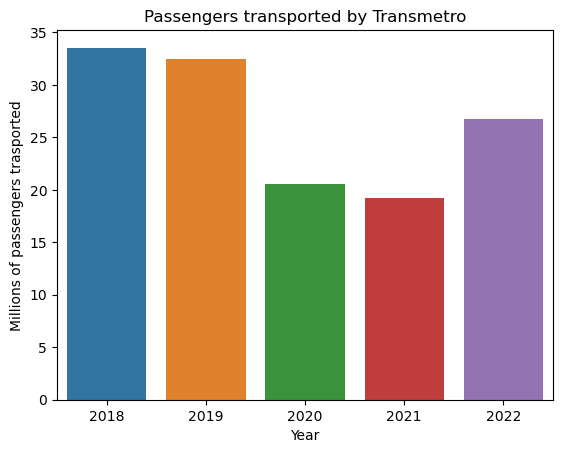

In [214]:
sns.barplot(data=dataset4_year, x='Year', y='VALUE')
plt.ylabel('Millions of passengers trasported')
plt.title('Passengers transported by Transmetro');

In [223]:
#Creating a merged dataframe

merged_df=dataset_year.merge(dataset4_year,how='inner',on='Year')
merged_df=merged_df.drop(columns=['Transport Type_x','UNIT_x','Transport Type_y','UNIT_y'])
merged_df.rename(columns={'VALUE_x':'Passengers Luas','VALUE_y':'Passengers Transmetro'},inplace=True)
merged_df

,Year,Passengers Luas,Passengers Transmetro
0,2018,41.836969,33.541635
1,2019,48.347231,32.461629
2,2020,19.176056,20.550978
3,2021,19.481319,19.176607
4,2022,38.667875,26.793492


Text(0.5, 1.0, 'Passengers Transported')

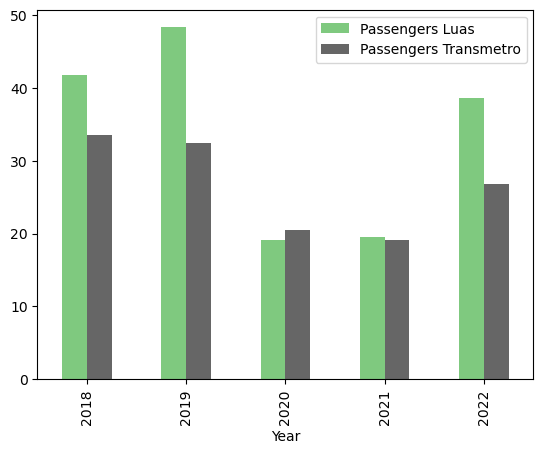

In [240]:
merged_df.plot(x='Year', y=['Passengers Luas','Passengers Transmetro'],kind='bar',cmap='Accent');
ax.set_title('Passengers Transported')

In [64]:
# Original values
values = np.array([
    [5539248.0, 41836969],
    [5193907.0, 48347231],
    [2675818.0, 19176056],
    [2337897.0, 19481319],
    [2933390.0, 38667875]
])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the values
normalized_values = scaler.fit_transform(values)

# Display the normalized values
print(normalized_values)

[[ 1.33661363  0.69538668]
 [ 1.08063065  1.23853083]
 [-0.78589527 -1.19518892]
 [-1.0363782  -1.16972116]
 [-0.5949708   0.43099257]]


In [52]:
# Extracting the data in a numpy array to normalize it
x_a = pd.Series(merged_df['Passengers Luas'].to_numpy(), merged_df['Passengers Qrobus'].to_numpy())

print(x_a)


5539248.0    41836969
5193907.0    48347231
2675818.0    19176056
2337897.0    19481319
2933390.0    38667875
dtype: int64


In [58]:
x_a

5539248.0    41836969
5193907.0    48347231
2675818.0    19176056
2337897.0    19481319
2933390.0    38667875
dtype: int64

In [60]:
x_a=preprocessing.normalize([x_a])

TypeError: list indices must be integers or slices, not tuple

In [ ]:
# Normalizing the data

x_a=preprocessing.normalize([x_a])
print(x_a)
x_a=x_a.T
x_a
# Assigning normalized data
#merged_df = merged_df.assign(x_a)
#dataset_year

In [ ]:
# Import libraries to nrmilize data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# Extracting the data in a numpy array to normalize it
x_a = pd.Series(dataset_year['VALUE'].to_numpy())

# Normalizing the data

x_a=preprocessing.normalize([x_a])
x_a=x_a.T

# Assigning normalized data
dataset_year['Normalized_Value'] = dataset_year['VALUE']
dataset_year=dataset_year.assign(Normalized_Value=x_a)
dataset_year

In [ ]:
# Extracting the data in a numpy array to normalize it
x_a = pd.Series(dataset3_year['VALUE'].to_numpy())

# Normalizing the data

x_a=preprocessing.normalize([x_a])
x_a=x_a.T

# Assigning normalized data
dataset3_year['Normalized_Value'] = dataset3_year['VALUE']
dataset3_year=dataset3_year.assign(Normalized_Value=x_a)
dataset3_year

In [ ]:
plt.figure
fig,ax=plt.subplots(figsize=(10,5));
ax.bar(data=dataset_year,x='Year',height='Normalized_Value',color='green');
ax.bar(data=dataset3_year,x='Year',height='Normalized_Value',color='red');
ax.set_title('Passengers by Luas & Qrobus');
plt.figure;